In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import DecisionTrees.common_decision_tree as common_decision_tree
import TrainingCurves

import numpy as np
from sklearn import tree

In [2]:
GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_DECISION_TREE"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Decision Trees"
DATASET = "Noisy Non-Linear"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.05)

In [3]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times =\
TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='gini'), X_train, y_train, "accuracy")

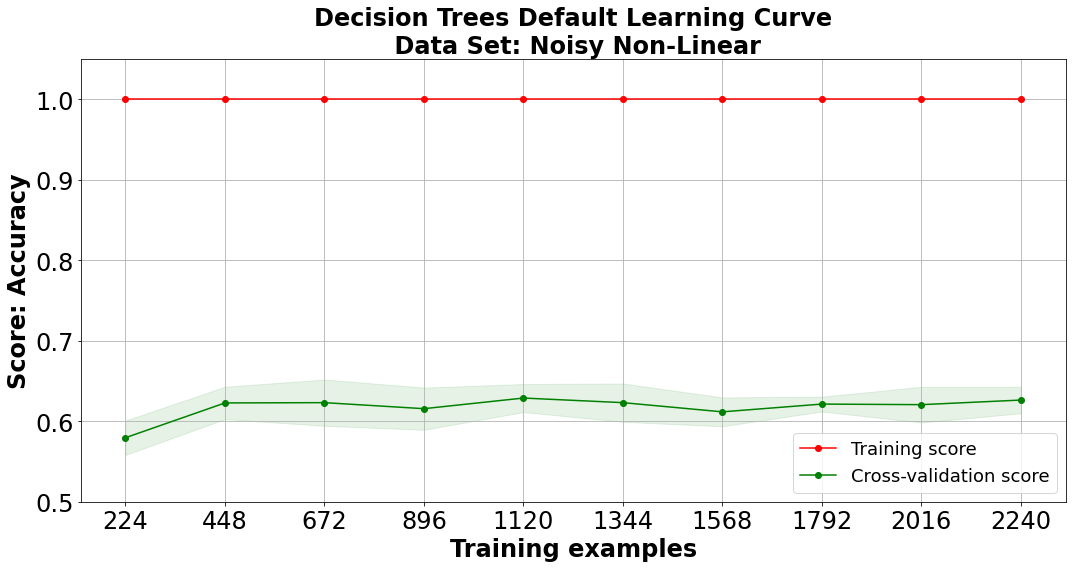

In [5]:
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

In [6]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
max_features = [i for i in range(num_features+1)]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished


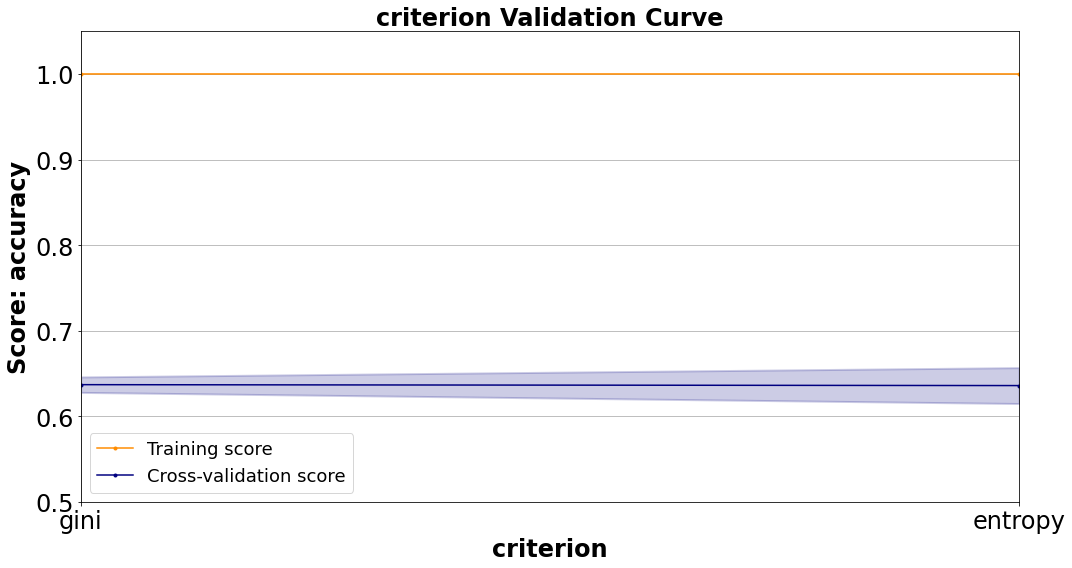

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.5s finished


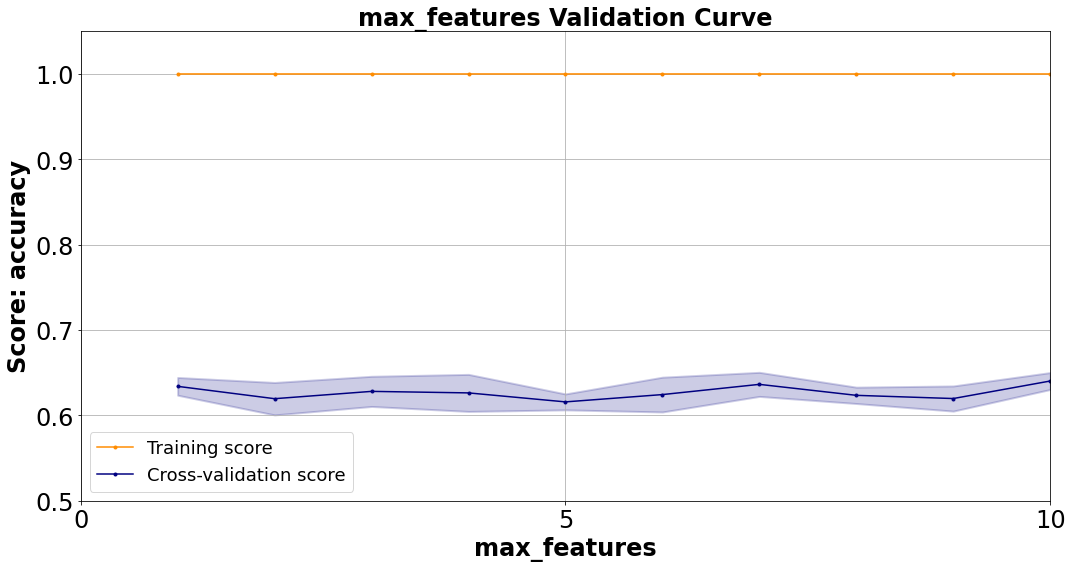

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "criterion", criterion, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "criterion", criterion, title="criterion Validation Curve", scoring="accuracy", tick_spacing=1, ylim=ylim)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_features", max_features, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_features", max_features, title="max_features Validation Curve", scoring="accuracy", tick_spacing=5, ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.0s finished


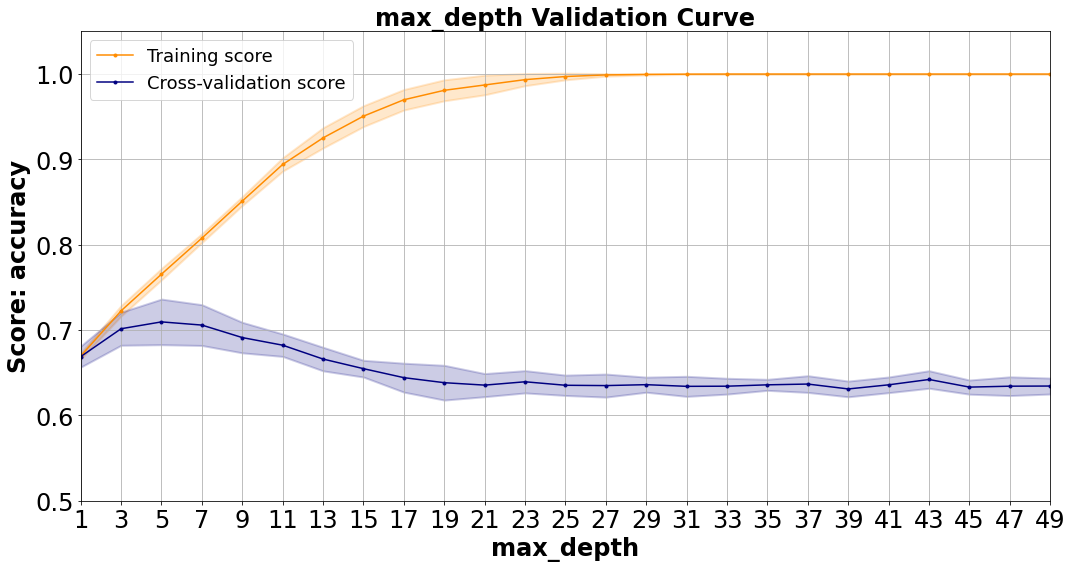

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished


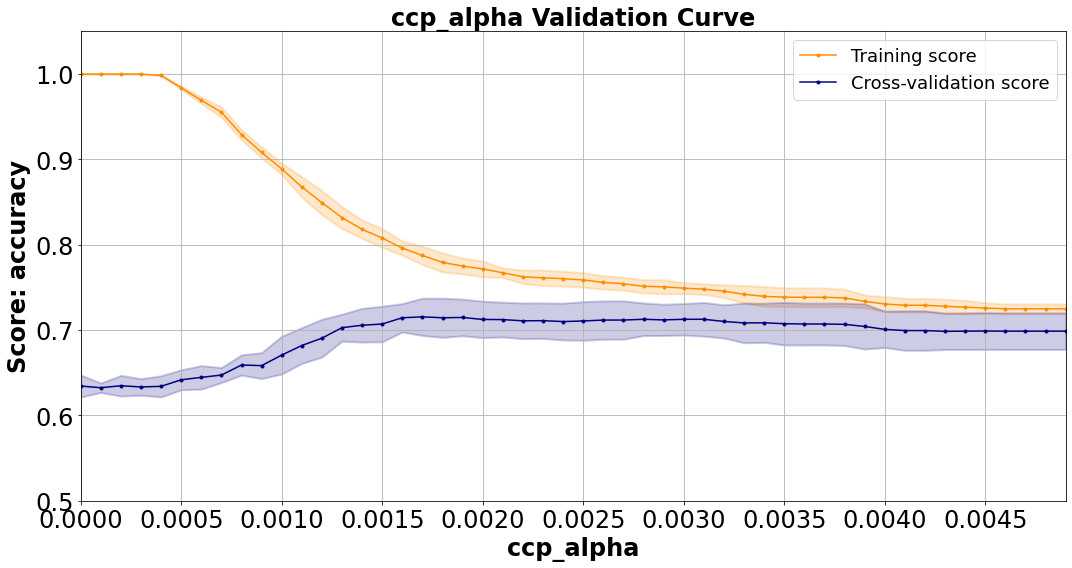

In [8]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1, ylim=ylim)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=5, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.5s finished


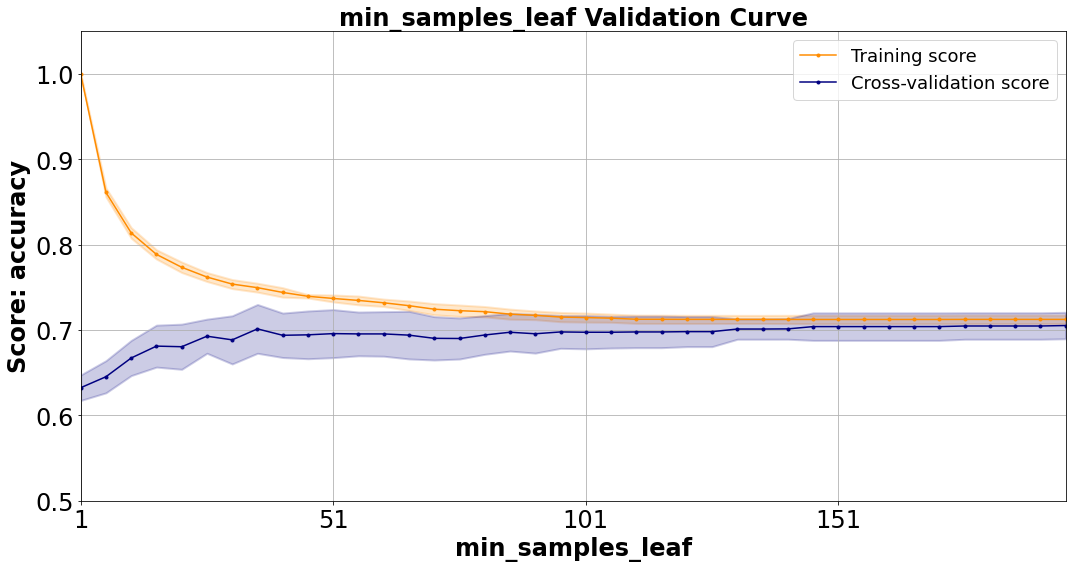

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


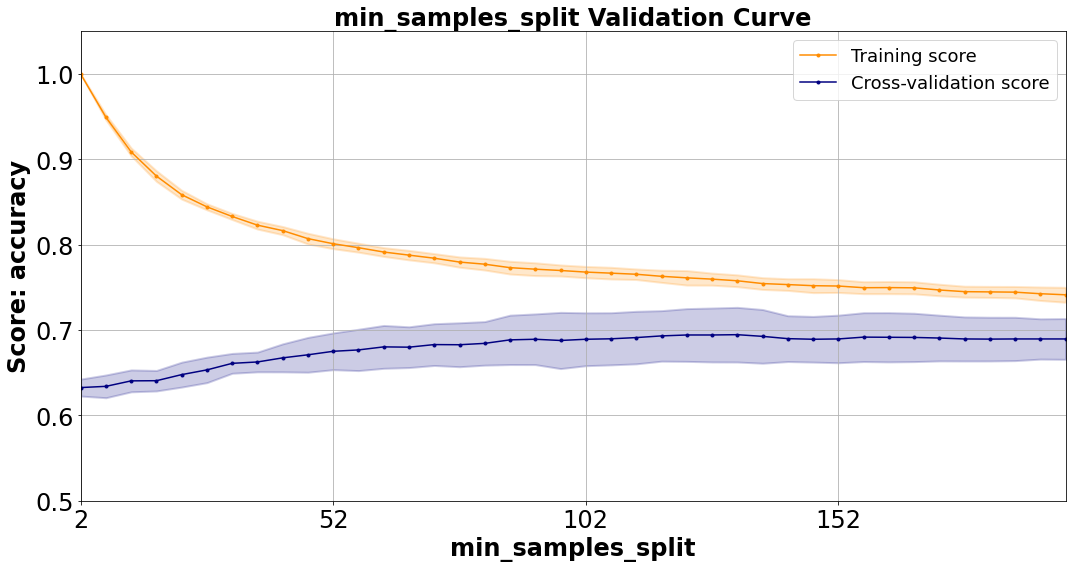

In [9]:
test_parameters={}
# test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10, ylim=ylim)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_split Validation Curve", scoring="accuracy", tick_spacing=10, ylim=ylim)


In [10]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 50, 2)]
min_samples_leaf = [i for i in range(1, 50, 2)]
max_depth = [i for i in range(1, 50, 1)]
max_features = [i for i in range(num_features+1)]

parameters = {'criterion': criterion, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

parameters = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'ccp_alpha': ccp_alpha}

gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/NOISY_NONLINEAR_DECISION_TREE_max_depth_1-49_min_samples_leaf_1-49_min_samples_split_2-48_ccp_alpha_0.0-0.0049.pickle
Fitting 5 folds for each of 1470000 candidates, totalling 7350000 fits


KeyboardInterrupt: 

In [ ]:
unused_params_values = {'min_samples_leaf': 11, 'min_samples_split': min(min_samples_split), 'max_features': max(max_features), 'max_depth': max(max_depth)}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values)


In [ ]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET)

In [ ]:
unused_params = {'ccp_alpha': min(ccp_alpha), 'max_depth': max(max_depth), 'min_samples_leaf': 1, 'min_samples_split': 2}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=2)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)

In [ ]:
unused_params = {'ccp_alpha': min(ccp_alpha), 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=2)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, tick_spacing=2)

In [ ]:
unused_params = {'ccp_alpha': 0.0025, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=2)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)

In [ ]:
mean_score_limit=0.706
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'max_depth', mean_score_limit, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

In [ ]:
final_params = {'ccp_alpha': 0.0025, 'max_depth': 4, 'criterion': 'gini'}
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(**final_params), X_train, y_train, "accuracy")

In [ ]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

In [ ]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))

In [ ]:
clf = tree.DecisionTreeClassifier(**final_params)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))



In [ ]:
print("Correct Non Noisy Test Accuracy {}%".format(round(clf.score(X_test, y_test_non_noisy)*100, 1)))